# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Aqui realizo o import das bibliotecas que serão utilizadas.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
# Aqui estou importando o arquivo csv que será análisado.

sinasc_raw = pd.read_csv('/content/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


## Antes de iniciar a tarefa irei realizar a limpeza dos dados e selecionar apenas os dados que serão relevantes para essa análise.


In [103]:
# Aqui seleciono apenas as colunas de dados que serão utilizados.

sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'DTNASC', 'SEXO', 'munResNome', 'PESO']]

In [104]:
# A base de dados tem 27.028 linhas de dados.

sinasc_1.shape

(27028, 8)

In [105]:
# Se eu remover os dados faltantes terei 7.450 linhas de dados que é apenas ~30% da base de dados.
# Grande parte dessa diminuição da base de dados está relacionada à coluna IDADEPAI que apresenta 7.607 linhas de dados.

sinasc_1.dropna().shape

(7388, 8)

In [106]:
sinasc_1['IDADEPAI'].count()

7607

In [107]:
# No exercício da aula o professor descartou todas as linhas vazias.
# Ao meu ver não é o mais indicado, pois estamos jogando quase 70% dos dados fora.
# Por mim deveria ser utilizada outra abordagem, mas ainda não tenho discernimento para determinar qual seria essa melhor abordagem, por enquanto irei manter-la.

sinasc = sinasc_1.dropna()

## Com a base de dados limpa irei iniciar a tarefa.

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [109]:
# Aqui uso o groupby e passo como index o munResNome e, IDADEMAE e IDADEPAI como colunas. Depois uso o método mean para calcular a média das idades das mães e pais.

sinasc.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean().sort_values('IDADEMAE')

<ipython-input-109-aa4d341e08ee>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean().sort_values('IDADEMAE')


,IDADEMAE,IDADEPAI
munResNome,,
Alto Paraíso,23.400000,29.200000
Candeias do Jamari,23.500000,30.187500
Município ignorado - RO,24.000000,22.000000
Alto Alegre dos Parecis,24.575758,29.128788
Theobroma,24.916667,30.083333
Seringueiras,25.058824,30.500000
Buritis,25.266667,32.200000
Pimenta Bueno,25.368836,29.678501
Costa Marques,25.395349,30.813953


<ipython-input-110-c627b6fae03b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean().sort_values('IDADEMAE').plot(figsize=[15, 10])


<Axes: xlabel='munResNome'>

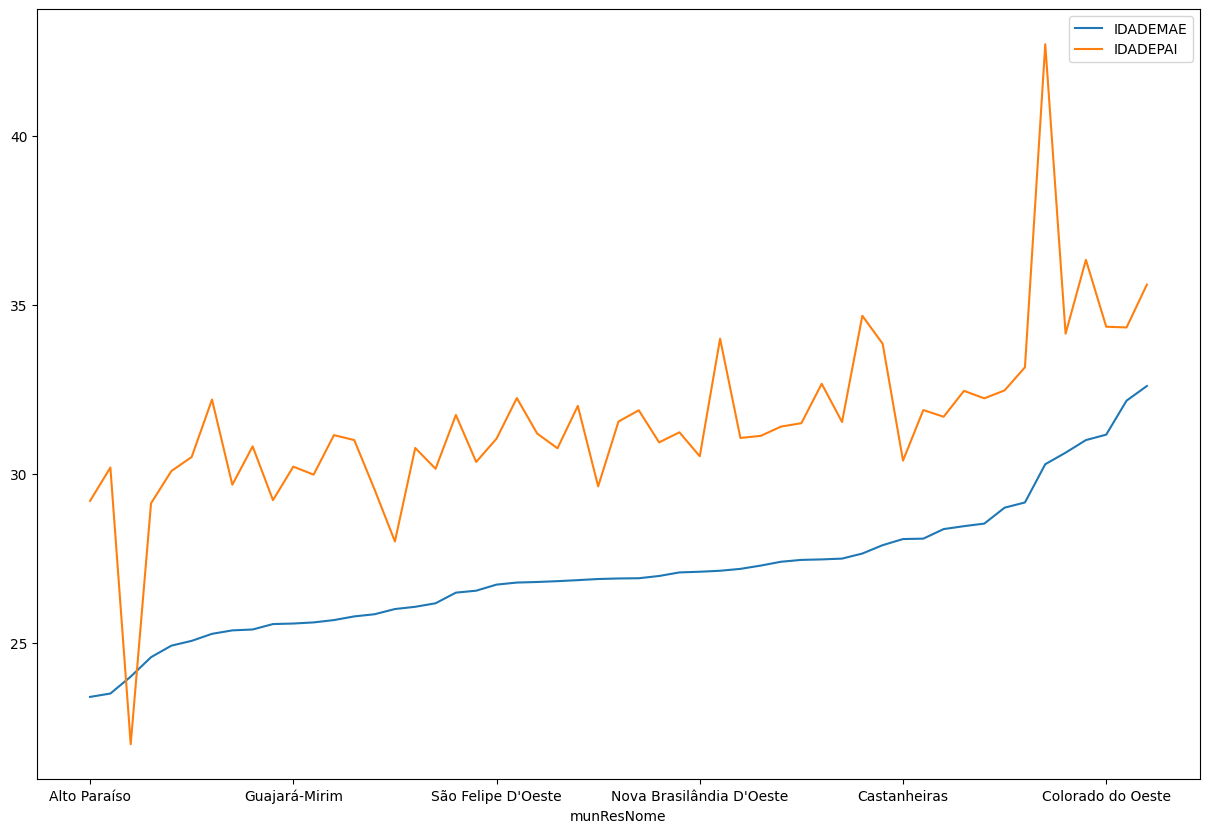

In [110]:
sinasc.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean().sort_values('IDADEMAE').plot(figsize=[15, 10])

# Analisando as médias das idades das mães e dos pais, observa-se que de modo geral a idade média dos pais é superior à idade média das mães.

In [111]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [112]:
# Primeiro filtrei a coluna das datas para o dia do meu aniversário, 09 de junho.

sinasc_nasc = sinasc[sinasc['DTNASC']=='2019-06-09']

In [113]:
# Depois agrupei os dados usando o groupby e calculei a média.
# Utilizei o unstack para separa o SEXO em duas colunas.

# Na média os bebês do sexo masculino apresentam um peso maior que do sexo feminino.

sinasc_nasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
DTNASC,,
2019-06-09,2116.0,3505.714286


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [114]:
# Para saber qual município apresentou menos bebes em 2019 usei o groupby nos municipios, e fiz uma contagem do SEXO.
# Além disso, deixei os dados em ordem crescente.

# O município com menos bebes nascidos em 2019 foi Rio Crespo, com apenas 01 bebe.

sinasc.groupby('munResNome')['SEXO'].count().sort_values()

munResNome
Rio Crespo                      1
Município ignorado - RO         1
Alto Paraíso                    5
Pimenteiras do Oeste            5
Cabixi                          6
Cacaulândia                     6
Itapuã do Oeste                 7
Governador Jorge Teixeira       9
Cujubim                        10
Theobroma                      12
Ariquemes                      13
Guajará-Mirim                  14
Vale do Anari                  15
Candeias do Jamari             16
Corumbiara                     17
Campo Novo de Rondônia         23
Chupinguaia                    27
Castanheiras                   28
Monte Negro                    28
Colorado do Oeste              31
São Francisco do Guaporé       34
Seringueiras                   34
Nova Mamoré                    35
Primavera de Rondônia          36
Parecis                        37
Costa Marques                  43
Vale do Paraíso                43
Teixeirópolis                  44
Buritis                        45
São

In [115]:
# Para deixar a análise mais fácil filtrei os dados para Rio Crespo e depois realizei o groupby.

sinasc_mun = sinasc[sinasc['munResNome'] == 'Rio Crespo']

In [116]:
# Usando o agg eu calculo a média, o máximo e o mínimo.

# Como esse município só possui um valor, a média, o máximo e o mínimo são iguais.

sinasc_mun.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].agg(['mean', 'max', 'min'])

<ipython-input-116-17583f1d28e3>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_mun.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].agg(['mean', 'max', 'min'])


IDADEMAE         IDADEPAI            
               mean max min     mean   max   min
munResNome                                      
Rio Crespo     26.0  26  26     28.0  28.0  28.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [117]:
# Primeiro filtrei os dados para o mês de março de 2019.

sinasc_marco = sinasc[(sinasc['DTNASC'] >= '2019-03-01') & (sinasc['DTNASC'] <= '2019-03-31')]

In [118]:
# Depois usei o groupby em ordem decrescente para saber qual o município com mais bebês.

# O município com mais bebês foi Cacoal

sinasc_marco.groupby('munResNome')['SEXO'].count().sort_values(ascending=False)

munResNome
Cacoal                      122
Ji-Paraná                    94
Rolim de Moura               66
Pimenta Bueno                52
Ouro Preto do Oeste          40
Porto Velho                  36
Espigão D'Oeste              30
Alta Floresta D'Oeste        24
Vilhena                      16
Presidente Médici            14
Urupá                        13
Machadinho D'Oeste           13
Buritis                      12
Alvorada D'Oeste             10
Alto Alegre dos Parecis       9
Jaru                          9
Cerejeiras                    9
Nova Mamoré                   9
Santa Luzia D'Oeste           7
Monte Negro                   6
Vale do Paraíso               6
Ministro Andreazza            6
Parecis                       5
Novo Horizonte do Oeste       5
Chupinguaia                   5
Castanheiras                  4
Primavera de Rondônia         4
Colorado do Oeste             4
São Felipe D'Oeste            4
Vale do Anari                 3
Teixeirópolis                

In [119]:
# Assim como fiz acima filtrei pelo município para facilitar a análise.

sinasc_mun_1 = sinasc_marco[sinasc_marco['munResNome'] == 'Cacoal']

In [120]:
# Depois utilizei o groupby e o agg para ver os dados.

# Aqui vemos que a média é menor que 1. Ao meu ver, ou essas mulheres são mães de primeira viagem ou os filhos que elas tiveram antes morreram, o que é algo bem triste de se pensar.

sinasc_mun_1.groupby('munResNome')['QTDFILVIVO'].agg(['mean', 'max', 'min'])

,mean,max,min
munResNome,,,
Cacoal,0.92623,7.0,0.0


In [121]:
# Pensando em determinar qual das hipoteses levantadas faz mais sentido, rodei novamente os blocos de código adicionando o QTDFILMORT.

# Como a média deu um valor muito próximo de zero, posso assumir que grande parte de mulheres são mães de primeira viagem.

sinasc_mun_1.groupby('munResNome')['QTDFILMORT'].agg(['mean', 'max', 'min'])

,mean,max,min
munResNome,,,
Cacoal,0.270492,3.0,0.0


In [123]:
# Usando o groupby e o agg calculo a média, o máximo e o mínimo da idade dos pais deste município.

# Coloquei o desvio padrão também para saber o quão longe o máximo e o mínimo estão da média.
# Tanto o máximo quanto o mínimo estão fora do intervalo.

sinasc_mun_1.groupby('munResNome')['IDADEPAI'].agg(['mean', 'max', 'min', 'std'])

,mean,max,min,std
munResNome,,,,
Cacoal,30.008197,47.0,17.0,7.121723


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [70]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [71]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [72]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')